In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [60]:
file_path = 'Resources/myopia.csv'

In [61]:
df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [62]:
df.sample(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
597,6,1.010,22.620001,3.478,3.710,15.44,7,2,2,0,3,13,1,0,0
469,6,0.409,23.160000,3.518,3.894,15.74,5,5,2,5,5,39,1,0,0
346,5,1.034,21.490000,3.384,3.724,14.38,20,2,2,2,2,18,1,0,0
562,6,0.267,22.820000,3.434,3.406,15.98,18,0,2,0,27,31,1,1,0
339,7,1.322,22.379999,3.396,3.528,15.45,6,0,4,2,12,26,0,1,0
393,6,1.340,21.200001,3.330,3.266,14.60,20,0,1,0,10,12,1,1,0
376,6,2.688,22.950001,3.800,3.385,15.76,18,4,0,2,7,25,0,0,0
70,6,0.728,22.559999,3.676,3.836,15.05,30,7,7,0,20,55,1,1,0
118,6,0.434,22.549999,3.690,3.452,15.41,10,0,0,0,21,21,1,1,1
512,7,0.600,23.620001,3.636,3.482,16.50,41,1,7,1,11,31,1,1,0


In [63]:
targets = df.drop("MYOPIC", axis=1)

In [64]:
targets

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [65]:
# Create a scaler to standardize the data
scaler = StandardScaler()

In [66]:
# Train the scaler with the X_train data.
scaler.fit(targets)

StandardScaler()

In [67]:
features = scaler.transform(targets)
features

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [68]:
#PCA and providing explained variance ratio
pca = PCA(n_components=0.90)

features_pca = pca.fit_transform(features)

print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')

Explained Variance Ratio: [0.21177355 0.15659716 0.08688023 0.08301762 0.07584858 0.06997878
 0.06486986 0.06377808 0.05393666 0.05205566]


In [69]:
#Utilization of TSNE
tsne = TSNE(learning_rate=100)

features_tsne = tsne.fit_transform(features_pca)

/Users/antonioponce/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [70]:
#Adding transformed features to dataframe
targets['x']  = features_tsne[:,0]
targets['y'] = features_tsne[:,1]
targets['class'] = df['MYOPIC']

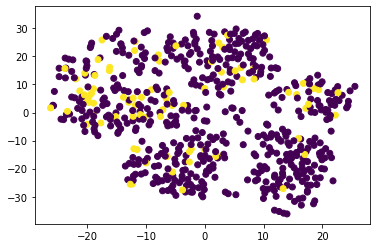

In [71]:
#Plotting scatter plot
plt.scatter(x = targets['x'], y = targets['y'], c = targets['class'])
plt.show()

Based upon this initial plot, we are unable to identify any distintive clusters.

In [72]:
#Creating a dataframe with two principal components
myopiadf_pca = pd.DataFrame(features_tsne, columns=["pc1", "pc2"])
myopiadf_pca.head()

,pc1,pc2
0,-7.756217,18.315266
1,-11.186963,-2.343967
2,12.232850,-14.493388
3,-12.088614,-12.917119
4,8.691956,12.523351


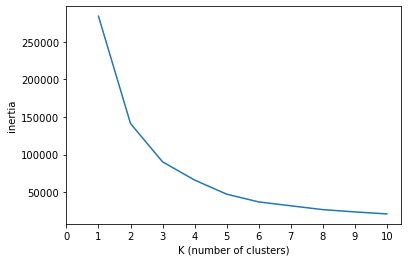

In [73]:
#Utilizing a for loop to help determine K value and calculating the inertia for the K values range
inertia = []

k = list(range(1, 11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=55)
    kmeans.fit(myopiadf_pca)
    inertia.append(kmeans.inertia_)
    

# create dataframe for elbow curve
curve_data = {"k": k, "inertia": inertia}

curve_data_df = pd.DataFrame(curve_data)

# PLOT
plt.plot(curve_data_df['k'], curve_data_df['inertia'])
plt.xticks(list(range(11)))
plt.xlabel("K (number of clusters)")
plt.ylabel("inertia")
plt.show()

In [74]:
#Prediction of Clusters
km_model = KMeans(n_clusters=5, random_state=40)
km_model.fit(myopiadf_pca)
predicted_clusters = km_model.predict(myopiadf_pca)
myopiadf_pca['class'] = km_model.labels_
myopiadf_pca.head()

,pc1,pc2,class
0,-7.756217,18.315266,1
1,-11.186963,-2.343967,2
2,12.232850,-14.493388,0
3,-12.088614,-12.917119,3
4,8.691956,12.523351,4


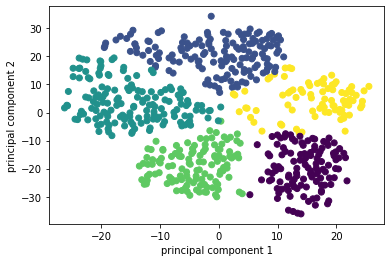

In [75]:
# Plotting clusters

plt.scatter(x = myopiadf_pca['pc1'], y = myopiadf_pca['pc2'], c = myopiadf_pca['class'])
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()